# 豆瓣读书数据分析

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', **{'family':'SimHei'})

## 导入数据

In [2]:
# 导入数据

df = pd.read_excel('books.xlsx')
df.head()

,书名,作者,出版社,出版时间,页数,价格,ISBN,评分,评论数量,Unnamed: 9
0,因扎吉传记 SUPERPIPPO,Mauro Suma,ECO Sport,2008/,224,O 14.5,9788881133581,9.4,69,NaN
1,中国武侠小说史论,叶洪生,None,1905-03-14 00:00:00,None,None,9787811074710,0.0,None,NaN
2,How to cook and eat in Chinese,杨步伟,The John Day company,1905-04-28 00:00:00,262,None,9780394717036,0.0,None,NaN
3,吐鲁番考古记,黄文弼,中国科学院出版社,1905-05-07 00:00:00,208,None,None,0.0,None,NaN
4,塞瓦斯托波尔故事,列夫·托尔斯泰,新文艺出版社,1905-05-08 00:00:00,172,None,None,0.0,None,NaN


In [3]:
len(df)

60671

In [4]:
# 删除第9列

df = df.drop('Unnamed: 9', axis=1)
df.head()

,书名,作者,出版社,出版时间,页数,价格,ISBN,评分,评论数量
0,因扎吉传记 SUPERPIPPO,Mauro Suma,ECO Sport,2008/,224,O 14.5,9788881133581,9.4,69
1,中国武侠小说史论,叶洪生,None,1905-03-14 00:00:00,None,None,9787811074710,0.0,None
2,How to cook and eat in Chinese,杨步伟,The John Day company,1905-04-28 00:00:00,262,None,9780394717036,0.0,None
3,吐鲁番考古记,黄文弼,中国科学院出版社,1905-05-07 00:00:00,208,None,None,0.0,None
4,塞瓦斯托波尔故事,列夫·托尔斯泰,新文艺出版社,1905-05-08 00:00:00,172,None,None,0.0,None


## 数据清洗

In [5]:
# 对数据做清洗（缺失值与异常值）

df.describe()

,评分
count,60671.000000
mean,7.165328
std,2.616292
min,0.000000
25%,7.300000
50%,7.900000
75%,8.500000
max,10.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60671 entries, 0 to 60670
Data columns (total 9 columns):
书名      60671 non-null object
作者      60668 non-null object
出版社     60671 non-null object
出版时间    60671 non-null object
页数      60671 non-null object
价格      60656 non-null object
ISBN    60671 non-null object
评分      60671 non-null float64
评论数量    60671 non-null object
dtypes: float64(1), object(8)
memory usage: 4.2+ MB


In [7]:
# 要做数据清洗啦

df.dtypes

书名       object
作者       object
出版社      object
出版时间     object
页数       object
价格       object
ISBN     object
评分      float64
评论数量     object
dtype: object

In [8]:
len(df)

60671

In [9]:
df.shape

(60671, 9)

In [10]:
df.dtypes

书名       object
作者       object
出版社      object
出版时间     object
页数       object
价格       object
ISBN     object
评分      float64
评论数量     object
dtype: object

In [11]:
df['页数'].describe()

count     60671
unique     2109
top        None
freq       4267
Name: 页数, dtype: object

In [12]:
# 这样看不出来

df['页数'].isnull().sum()

0

In [13]:
# 看看有多少 None 值页数信息

len(df[df['页数']=='None'])

4267

### 处理页数数据

In [14]:
# 定义 convert_to_int 方法处理页数数据，如果为 None 则填充 0 

import re
def convert2int(x):
    if re.match('^\d+$',str(x)):
        return x
    else:
        return 0

In [15]:
df['页数'] = df['页数'].apply(convert2int)
df.head(10)

,书名,作者,出版社,出版时间,页数,价格,ISBN,评分,评论数量
0,因扎吉传记 SUPERPIPPO,Mauro Suma,ECO Sport,2008/,224,O 14.5,9788881133581,9.4,69
1,中国武侠小说史论,叶洪生,None,1905-03-14 00:00:00,0,None,9787811074710,0.0,None
2,How to cook and eat in Chinese,杨步伟,The John Day company,1905-04-28 00:00:00,262,None,9780394717036,0.0,None
3,吐鲁番考古记,黄文弼,中国科学院出版社,1905-05-07 00:00:00,208,None,None,0.0,None
4,塞瓦斯托波尔故事,列夫·托尔斯泰,新文艺出版社,1905-05-08 00:00:00,172,None,None,0.0,None
5,敦煌变文集（上下集）,王重民,人民文学出版社,1905-05-10 00:00:00,922,None,None,0.0,None
6,可笑的女才子,[法] 莫里哀,作家出版社,1905-05-10 00:00:00,96,None,None,0.0,None
7,鲁迅传,石一歌,上海人民出版社,1905-05-29 00:00:00,148,None,None,0.0,None
8,中國邊疆民族與環太平洋文化,凌純聲,聯經出版事業股份有限公司,1905-06-01 00:00:00,0,None,9789106796871,0.0,None
9,两面间谍,约翰·马斯特曼,群众出版社,1905-06-01 00:00:00,182,None,None,0.0,None


In [16]:
df['页数'].describe()

count    6.067100e+04
mean     6.883281e+06
std      1.695365e+09
min      0.000000e+00
25%      1.940000e+02
50%      2.640000e+02
75%      3.600000e+02
max      4.175936e+11
Name: 页数, dtype: float64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60671 entries, 0 to 60670
Data columns (total 9 columns):
书名      60671 non-null object
作者      60668 non-null object
出版社     60671 non-null object
出版时间    60671 non-null object
页数      60671 non-null int64
价格      60656 non-null object
ISBN    60671 non-null object
评分      60671 non-null float64
评论数量    60671 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 4.2+ MB


In [18]:
# 处理页数数据

#df['页数'] = df['页数'].apply(lambda x: x if re.match('^\d+$', str(x)) else 0)
#df['页数'] = df['页数'].astype(int)

### 处理价格数据

In [19]:
# 处理价格数据

df['价格'] = df['价格'].apply(lambda x: x if re.match('^[\d\.]+$', str(x)) else 0)
df['价格'] = df['价格'].astype(float)

In [20]:
# 价格为 0 的图书数量

len(df[df['价格'] == 0])

3217

### 处理评论数量数据

In [21]:
# 处理评论数量数据

df['评论数量'] = df['评论数量'].apply(lambda x: x if re.match('^\d+$', str(x)) else 0)
df['评论数量'] = df['评论数量'].astype(int)

In [22]:
df.dtypes

书名       object
作者       object
出版社      object
出版时间     object
页数        int64
价格      float64
ISBN     object
评分      float64
评论数量      int64
dtype: object

In [23]:
df.head()

,书名,作者,出版社,出版时间,页数,价格,ISBN,评分,评论数量
0,因扎吉传记 SUPERPIPPO,Mauro Suma,ECO Sport,2008/,224,0.0,9788881133581,9.4,69
1,中国武侠小说史论,叶洪生,None,1905-03-14 00:00:00,0,0.0,9787811074710,0.0,0
2,How to cook and eat in Chinese,杨步伟,The John Day company,1905-04-28 00:00:00,262,0.0,9780394717036,0.0,0
3,吐鲁番考古记,黄文弼,中国科学院出版社,1905-05-07 00:00:00,208,0.0,None,0.0,0
4,塞瓦斯托波尔故事,列夫·托尔斯泰,新文艺出版社,1905-05-08 00:00:00,172,0.0,None,0.0,0


In [24]:
df.columns[:]

Index(['书名', '作者', '出版社', '出版时间', '页数', '价格', 'ISBN', '评分', '评论数量'], dtype='object')

In [25]:
df.sample(10)

,书名,作者,出版社,出版时间,页数,价格,ISBN,评分,评论数量
23083,戏剧、革命与都市漩涡,葛飞,北京大学出版社,2008/09,365,42.00,9787301141236,7.7,22
31339,筋长一寸 寿延十年,钟健夫,广东人民,2012/6,276,35.00,9787218062327,6.7,96
10062,数据可视化之美,Julie Steele,机械工业出版社,2011/6,456,89.00,9787111337966,7.8,241
55807,在轮下,[德] 赫尔曼·黑塞,上海译文出版社,2007/7,202,15.00,9787532742301,8.3,1850
16787,料理全书,高木初江,北京联合出版公司,2016/1,160,55.00,9787550258730,8.5,41
5187,敬愛的領袖,張振成（Jang Jin-sung）,臉譜,2015/4,336,380.00,9789862354216,8.2,50
57033,波斯古代诗选,张鸿年编选,人民文学出版社,1905-06-17 00:00:00,348,13.05,9787020020324,7.9,29
54936,从界面到网络空间,（美）海姆,上海科技教育出版社,2000/7,190,16.40,9787542822871,7.3,38
48133,信号与系统辅导与题解,None,None,2012/6,391,23.00,9787560979595,0.0,0
47201,最好的医生是自己,洪昭光,科学出版社,2007/02/01,221,24.80,9787030188533,7.7,18


In [26]:
df.describe()

,页数,价格,评分,评论数量
count,6.067100e+04,6.067100e+04,60671.000000,60671.000000
mean,6.883281e+06,1.348609e+02,7.165328,661.712762
std,1.695365e+09,9.790057e+03,2.616292,3885.365596
min,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.940000e+02,2.280000e+01,7.300000,24.000000
50%,2.640000e+02,3.200000e+01,7.900000,73.000000
75%,3.600000e+02,4.900000e+01,8.500000,266.000000
max,4.175936e+11,2.336095e+06,10.000000,209602.000000


## 年份信息加工

In [27]:
# 处理出版时间，只要年份

def year(s):
    y = re.findall('\d{4}',str(s))
    if len(y)>0:
        return y[0]
    return ''

In [28]:
# 有的直接是个数字 2.00711e+07

year('1999.11.05')
#year('2011/3')
#year('April 2010')
#year('2008')
#year('1905-06-04 00:00:00')
#year('01 June, 1959')
#year(201888888)

'1999'

In [29]:
# 增加“出版年份”字段

#df['出版年份'] = df['出版时间'].apply(year)
df['出版年份'] = df['出版时间'].apply(year)
#df['出版年份'] = df['出版时间'].apply(lambda x: y if y = re.findall('^\d{4}', str(x)) else '')

In [30]:
df.head(10)

,书名,作者,出版社,出版时间,页数,价格,ISBN,评分,评论数量,出版年份
0,因扎吉传记 SUPERPIPPO,Mauro Suma,ECO Sport,2008/,224,0.0,9788881133581,9.4,69,2008
1,中国武侠小说史论,叶洪生,None,1905-03-14 00:00:00,0,0.0,9787811074710,0.0,0,1905
2,How to cook and eat in Chinese,杨步伟,The John Day company,1905-04-28 00:00:00,262,0.0,9780394717036,0.0,0,1905
3,吐鲁番考古记,黄文弼,中国科学院出版社,1905-05-07 00:00:00,208,0.0,None,0.0,0,1905
4,塞瓦斯托波尔故事,列夫·托尔斯泰,新文艺出版社,1905-05-08 00:00:00,172,0.0,None,0.0,0,1905
5,敦煌变文集（上下集）,王重民,人民文学出版社,1905-05-10 00:00:00,922,0.0,None,0.0,0,1905
6,可笑的女才子,[法] 莫里哀,作家出版社,1905-05-10 00:00:00,96,0.0,None,0.0,0,1905
7,鲁迅传,石一歌,上海人民出版社,1905-05-29 00:00:00,148,0.0,None,0.0,0,1905
8,中國邊疆民族與環太平洋文化,凌純聲,聯經出版事業股份有限公司,1905-06-01 00:00:00,0,0.0,9789106796871,0.0,0,1905
9,两面间谍,约翰·马斯特曼,群众出版社,1905-06-01 00:00:00,182,0.0,None,0.0,0,1905


In [31]:
df.sample(10)

,书名,作者,出版社,出版时间,页数,价格,ISBN,评分,评论数量,出版年份
27143,JavaScript模式,Stoyan Stefanov,中国电力出版社,2012/7,208,38.00,9787512329232,8.6,194,2012
25495,女人明白要趁早之米字路口问答,王潇,北京联合出版公司,2014/12/1,227,39.00,9787550238183,7.7,416,2014
54393,乡村社会中的革命,陈德军,上海大学出版社,2004/08/01,224,17.20,9787810587358,8.1,19,2004
33967,职场急诊室,刘同,人民邮电出版社,2012/4,245,32.00,9787115279668,7.6,467,2012
51049,酒徒,刘以鬯,江苏文艺出版社,2011/6,227,20.00,9787539944227,8.5,440,2011
34444,做事坚定，做人柔软,[台] 丁菱娟,浙江大学出版社,2014/2/28,211,32.00,9787308127721,7.3,127,2014
51237,达利画传,读图时代,时代文艺出版社,2004/1/1,146,20.00,9787538718751,8.2,203,2004
30195,Upheavals of Thought,Martha C. Nussbaum,Cambridge University Press,2003/4/14,766,35.99,9780521531825,0.0,0,2003
42570,颠倒岁月,徐小棣,生活·读书·新知三联书店,2012/8,325,27.00,9787108040855,8.4,100,2012
31387,China Marches West,Peter C. Perdue,Belknap Press,2005/4/30,752,35.00,9780674016842,9.0,88,2005


In [32]:
len(df[df['出版年份'] == ''])

1035

In [33]:
df['出版年份'].describe()

count     60671
unique       85
top        2011
freq       4441
Name: 出版年份, dtype: object

## 分析图书数量与年份的关系

In [34]:
# 分析书的数量与年份的关系

# 按出版年份进行分组
grouped = df.groupby('出版年份')

In [35]:
data = grouped['ISBN'].count()
#data

In [36]:
# 手动修改 １９７９ 和 ２００２ 这两个数据

df[df['出版年份'] == '１９７９']

,书名,作者,出版社,出版时间,页数,价格,ISBN,评分,评论数量,出版年份
60632,鲁迅作品中的绍兴方言注释,谢德铣,浙江人民出版社,１９７９/初版印,110,0.24,None,0.0,0,１９７９


In [37]:
df.loc[df.index[60632], ['书名', '出版时间', '出版年份']]

书名      鲁迅作品中的绍兴方言注释
出版时间        １９７９/初版印
出版年份            １９７９
Name: 60632, dtype: object

In [38]:
df.loc[df.index[60632], ['出版年份']] = '1979'

In [39]:
df.loc[df.index[60632], ['书名', '出版时间', '出版年份']]

书名      鲁迅作品中的绍兴方言注释
出版时间        １９７９/初版印
出版年份            1979
Name: 60632, dtype: object

In [40]:
df[df['出版年份'] == '２００２']

,书名,作者,出版社,出版时间,页数,价格,ISBN,评分,评论数量,出版年份
4544,俄罗斯插画作品集,None,财团法人中华图书出版事业发展基金会,２００２/２,208,800.0,9789868003712,8.0,16,２００２


In [41]:
df.loc[df.index[4544], ['书名', '出版时间', '出版年份']]

书名      俄罗斯插画作品集
出版时间      ２００２/２
出版年份        ２００２
Name: 4544, dtype: object

In [42]:
df.loc[df.index[4544], ['出版年份']] = '2002'

In [43]:
df.loc[df.index[4544], ['书名', '出版时间', '出版年份']]

书名      俄罗斯插画作品集
出版时间      ２００２/２
出版年份        2002
Name: 4544, dtype: object

In [44]:
grouped = df.groupby('出版年份')
data = grouped['ISBN'].count()
#data

In [45]:
# 删除前7后4的数据

data2 = data[7:-4]
#data2

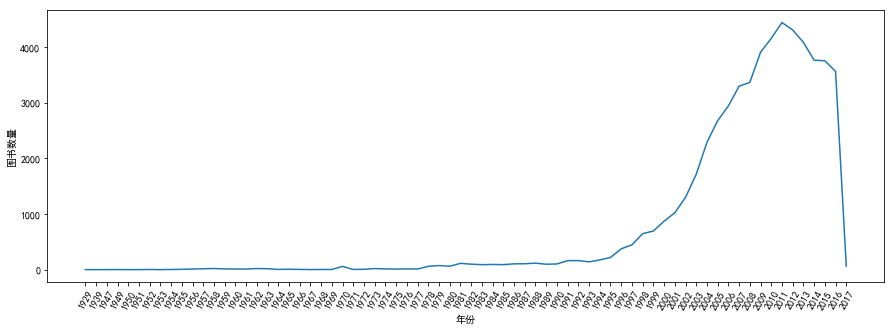

In [46]:
# 折线图反映年份和出版图书数量的关系

# 设置宽一点
plt.figure(figsize=(15, 5))
# 设置 x 周标签的倾斜角度
plt.xticks(rotation=60)

plt.xlabel('年份')
plt.ylabel('图书数量')

plt.plot(data2.index, data2.values)
plt.show()

## 分析图书的评分与年代之间是否有关系

In [47]:
# 分析书籍的评分与年代之间是否有关系

data3 = grouped['评分'].mean()
#data3

In [48]:
data3 = data3[7:-4]
#data3

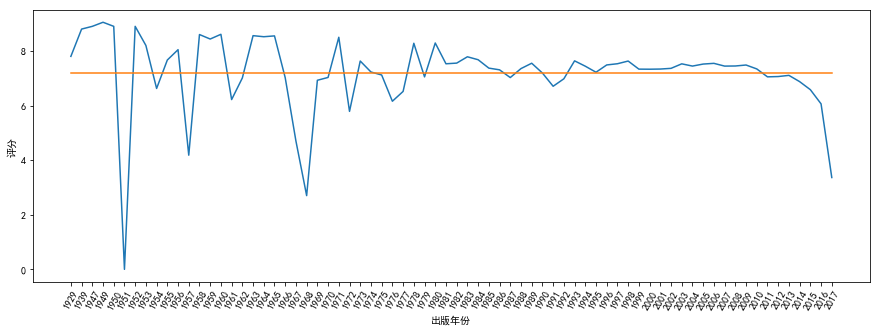

In [49]:
# 折线图反映年份和评分之间的关系

# 设置宽一点
plt.figure(figsize=(15, 5))
# 设置 x 周标签的倾斜角度
plt.xticks(rotation=60)
plt.xlabel('出版年份')
plt.ylabel('评分')

plt.plot(data3.index, data3.values)

# 均值
m = data3.values.mean()
plt.plot(data3.index, [m]*len(data3.index))

plt.show()

## 分析图书价格分布情况

In [50]:
# 图书价格

df2 = df[df['价格'] > 0]

In [51]:
len(df2)

57454

In [52]:
df2['价格'].describe()

count    5.745400e+04
mean     1.424121e+02
std      1.006036e+04
min      1.000000e-02
25%      2.500000e+01
50%      3.500000e+01
75%      4.990000e+01
max      2.336095e+06
Name: 价格, dtype: float64

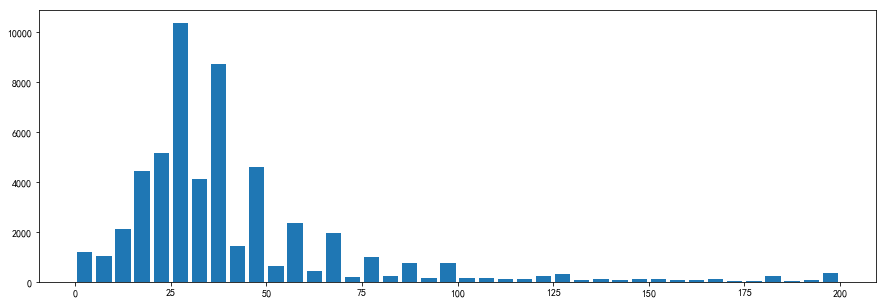

In [53]:
# 直方图显示图书价格分布情况

plt.figure(figsize=(15, 5))
plt.hist(df2['价格'], bins=40, range=(0, 200), rwidth=0.8)
plt.show()

In [54]:
# 柱形图

df2[(df2['价格']>=0) & (df2['价格']<10)].shape[0]

2244

In [55]:
df2[(df2['价格']>=10) & (df2['价格']<20)].shape[0]

6530

In [56]:
step = 10
count = 20
x = []
y = []
for i in range(count):
    y.append(df2[(df2['价格']>=i*step) & (df2['价格']<i*step+step)].shape[0])
y.append(df2[df2['价格']>=count*step].shape[0])

for i in range(count):
    x.append(str(i*step)+'-'+str(i*step+step))
x.append('>'+str(count*step))    

In [57]:
len(x)

21

In [58]:
len(y)

21

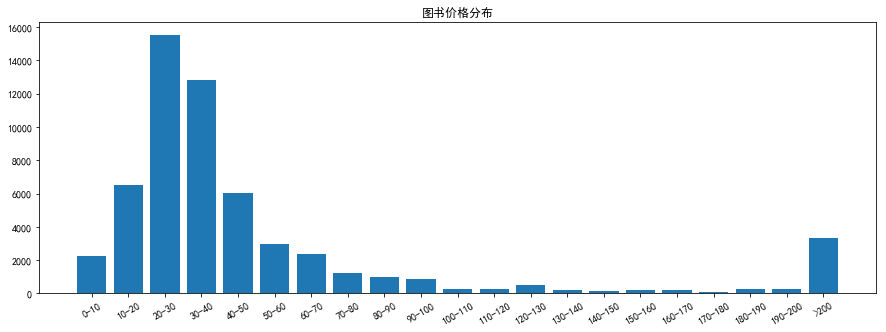

In [59]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation=30)
plt.title('图书价格分布')
plt.bar(x, y)
plt.show()

## 出版书籍最多的20个出版社

In [60]:
# 出版书籍最多的20个出版社

data4 = df.groupby('出版社')['ISBN'].count()

In [61]:
#data4 = data4.sort_values()
# 最大的是 None，要去掉
#data4 = data4[:-1]
#data4

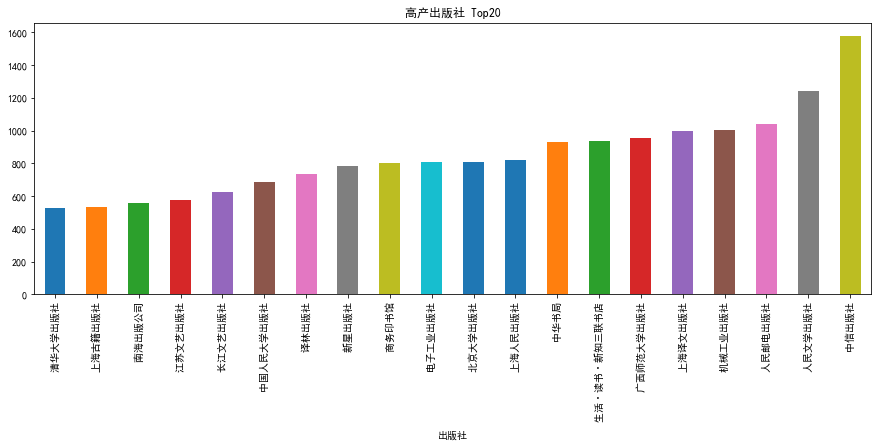

In [62]:
plt.figure(figsize=(15, 5))
plt.title('高产出版社 Top20')

# 最多的是 None，要去掉，所以选择 -21:-1
data4.sort_values()[-21:-1].plot(kind='bar')
plt.show()

## 评分较高的出版社

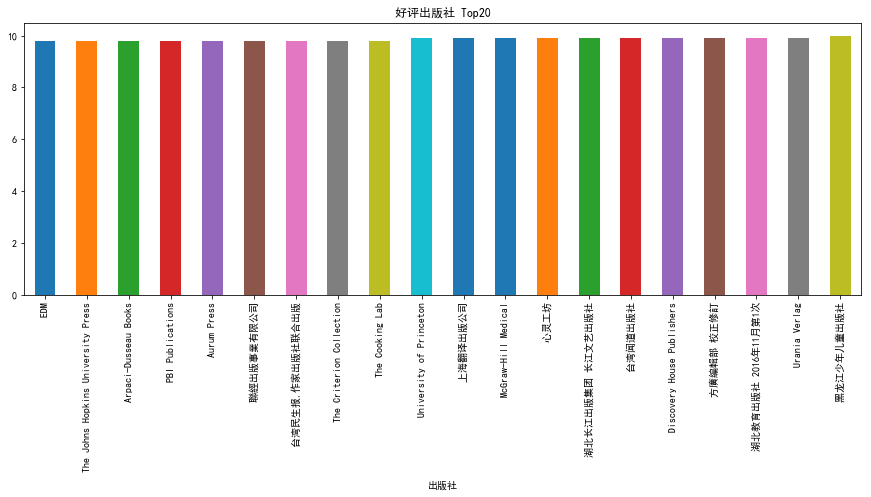

In [63]:
# 评分较高的出版社

plt.figure(figsize=(15, 5))
plt.title('好评出版社 Top20')

data5 = df.groupby('出版社')['评分'].mean()
data5.sort_values()[-20:].plot(kind='bar')
plt.show()

## 出书较多的作者

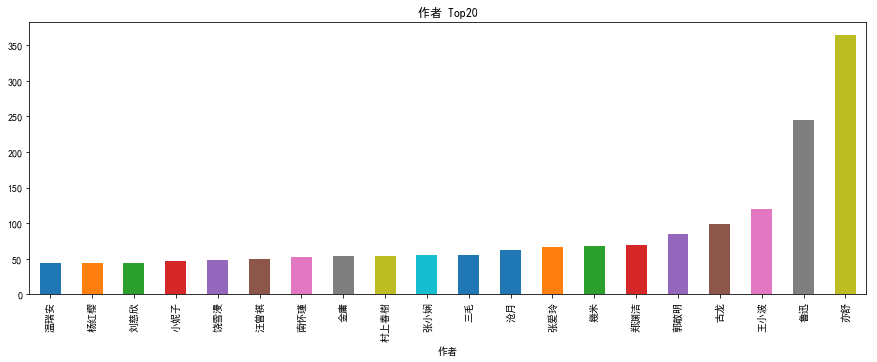

In [64]:
# 出书较多的作者

plt.figure(figsize=(15, 5))
plt.title('作者 Top20')

data6 = df.groupby('作者')['ISBN'].count()
data6.sort_values()[-21:-1].plot(kind='bar')
plt.show()

## 评分高低与评论数量之间是否存在某种关系

In [65]:
df.corr()

,页数,价格,评分,评论数量
页数,1.000000,-0.000030,0.003157,-0.000658
价格,-0.000030,1.000000,0.001443,-0.001673
评分,0.003157,0.001443,1.000000,0.063536
评论数量,-0.000658,-0.001673,0.063536,1.000000


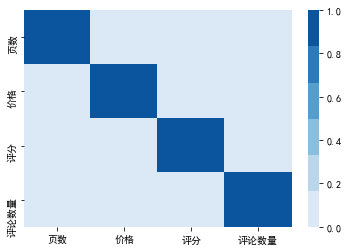

In [66]:
# 评分高低与评论数量之间是否存在某种关系

import seaborn as sns

# 计算相关性矩阵
corr = df.corr()
sns.heatmap(corr, cmap=sns.color_palette('Blues'))
plt.show()

### 评分高低与评论数量之间没有明显关系